In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
tf.__version__

'1.13.1'

In [3]:
(train_x, train_labels), (test_x, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
train_x.shape,test_labels.shape

((60000, 28, 28), (10000,))

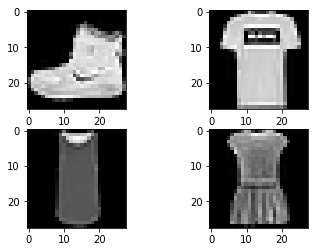

In [5]:
plt.subplot(221)
plt.imshow(train_x[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_x[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_x[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_x[3], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
train_x[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00135942 0.    

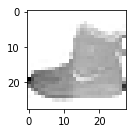

In [7]:
train_x=tf.keras.utils.normalize(train_x, axis=1)
test_x=tf.keras.utils.normalize(test_x, axis=1)
plt.subplot(221)
plt.imshow(train_x[0], cmap=plt.cm.binary)
print(train_x[0])

In [14]:

model= tf.keras.models.Sequential()
#input layer
model.add(tf.keras.layers.Flatten())
#hidden layer
model.add(tf.keras.layers.Dense(125,activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(125,activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [15]:
#parameters for model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_x, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5077 - acc: 0.8186
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3740 - acc: 0.8635
Epoch 3/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3342 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3079 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2900 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2762 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2618 - acc: 0.9019
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2497 - acc: 0.9071
Epoch 9/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2384 - acc: 0.9100
Epoch 10/10
60000/60000 [==============================] - 7s 121us/sampl

In [16]:
val_loss, val_acc= model.evaluate(test_x,test_labels)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3301 - acc: 0.8847
0.3301216322720051 0.8847


In [17]:
model.save('fashionrecognizer.model')


In [18]:
new_model = tf.keras.models.load_model('fashionrecognizer.model')

In [19]:
predictions =new_model.predict(test_x)
print(predictions)

[[2.00407214e-07 2.54209206e-11 2.29845373e-05 ... 7.99788721e-03
  3.65366736e-06 9.91841435e-01]
 [4.44855366e-04 6.10105122e-09 9.96216953e-01 ... 8.18922929e-10
  8.10740005e-07 1.87478418e-12]
 [2.76028277e-05 9.99970078e-01 2.23437837e-08 ... 8.10670975e-11
  2.02406625e-09 3.99522185e-13]
 ...
 [7.26888888e-04 7.07971193e-09 2.55684630e-04 ... 1.27766242e-07
  9.97480333e-01 9.53745156e-12]
 [1.57671536e-06 9.99912024e-01 1.26643829e-06 ... 1.06051232e-07
  5.26135693e-07 3.25233662e-09]
 [1.19236290e-07 7.40983608e-10 1.00176045e-07 ... 8.13628314e-04
  4.28473810e-03 4.81075482e-08]]


2


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

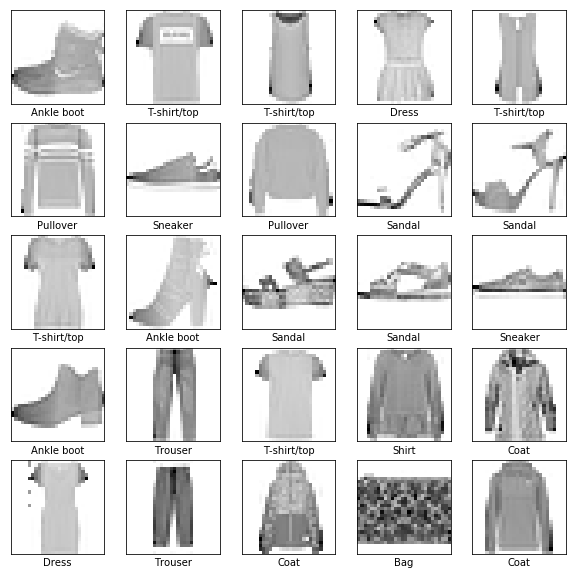

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
import numpy as np
print(np.argmax(predictions[1]))

2


In [32]:
print(test_labels[1])


2


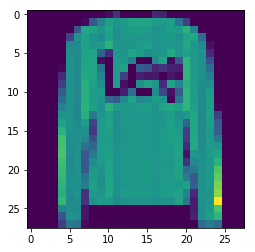

In [33]:
plt.imshow(test_x[1])
plt.show()

In [39]:
def fashion(x):
    if(x==0):
        print("T-shirt/Top")
    elif(x==1):
        print("Trouser")
    elif(x==2):
        print('Pullover')
    elif(x==3):
        print('Dress')
    elif(x==4):
        print('Coat')
    elif(x==5):
        print('Sandal')
    elif(x==6):
        print('Shirt')
    elif(x==7):
        print('Sneaker')
    elif(x==8):
        print('Bag')
    elif(x==9):
        print('Ankle boot')
import numpy as np
x=np.argmax(predictions[1])
print("Predicted as:")
fashion(x)
y=(test_labels[1])
print("Labeled as:")
fashion(y)


Predicted as:
Pullover
Labeled as:
Pullover


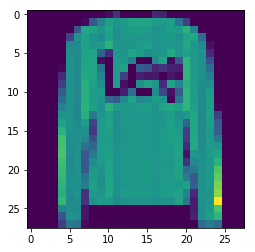

In [40]:
plt.imshow(test_x[1])
plt.show()